# 패션 MNIST 이미지 분류하기
참고)https://www.tensorflow.org/tutorials/keras/classification



In [9]:
# import
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


### 패션 MNIST 데이터셋 임포트하기
10개의 카테고리, 7만개의 흑백 이미지, 28x28

In [10]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

- 클래스 변수 만들기

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

- train data set 확인

In [12]:
X_train.shape

(60000, 28, 28)

60,000장 28x28 사이즈

In [13]:
len(y_train)

60000

In [14]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
len(y_test)

10000

### 데이터 전처리
픽셀 범위 확인 (0~255)

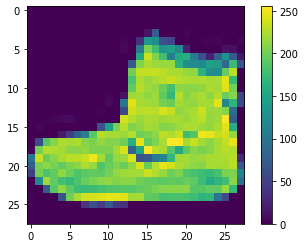

In [16]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

정규화를 위해 255로 나누어준다.

In [17]:
X_train = X_train/255
X_test = X_test/255

훈련 세트에서 처음 25개의 이미지와 클래스 명 출력해보기.

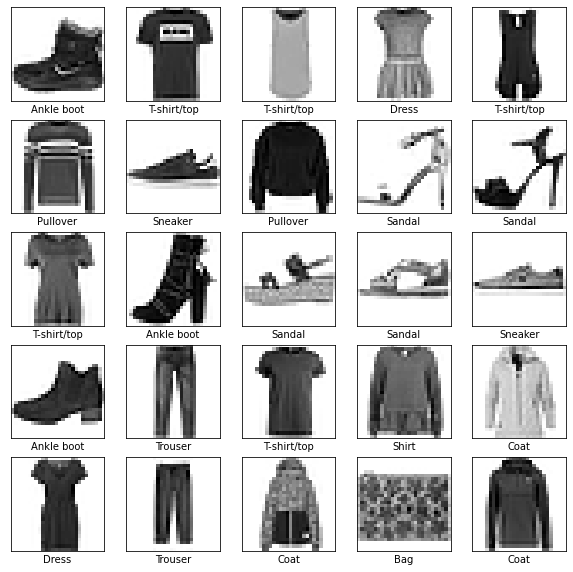

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## 모델 구성하기

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10)
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


- model complie

In [22]:
model.compile(optimizer = 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 훈련하기

In [23]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 2ms/step - loss: 0.4958 - accuracy: 0.8262
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3758 - accuracy: 0.8642
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3367 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3134 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2947 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2804 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2682 - accuracy: 0.9012
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2597 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2514 - accuracy: 0.9064
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.24

모델이 train data set으로 학습이 되었고, loss와 accuracy를 확인했다.  
이제 이 모델을 가지고 testdata set에 얼마나 잘 먹는지 보자.  

In [24]:
test_loss, test_acc=model.evaluate(X_test, y_test, verbose= 2)
print('\nTest Accuracy:', test_acc)

313/313 - 1s - loss: 0.3445 - accuracy: 0.8789

Test Accuracy: 0.8788999915122986


그 결과 테스트데이터를 통한 모델의 정확도는 **0.8789**가 나왔다.  
학습데이터를 가지고 학습한 모델의 정확도보다는 다소 낫다. 그 이유는 '오버피팅'에 있다.(학습데이터 쪽)  

## 예측하기
훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행할 수 있다. 소프트맥스를 사용하겠다.  


In [26]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [27]:
# 테스트데이터 셋의 각 이미지를 예측한다.
pred=probability_model.predict(X_test) #predict()사용

In [28]:
# 그 중 예측한 하나의 결과를 보자. 
pred[0]

array([1.8549728e-05, 9.4909758e-10, 4.0551793e-08, 1.3262436e-10,
       1.0757275e-08, 3.0361672e-03, 1.4618784e-07, 1.9027906e-02,
       3.3668321e-06, 9.7791380e-01], dtype=float32)

10개의 숫자 배열로 나타났고, 이 값은 10개의 옷 품목에 맞는 신뢰도를 나타낸다.  

In [29]:
# 가장 높은 신뢰도를 갖는 클래스를 찾자.
np.argmax(pred[0])

9

#### 예측 클래스로 '9'를 반환했다

9의 클래스가 맞는지 확인해보자. (앵클 부츠)

In [30]:
y_test[0]

9

테스트 레이블 데이터[0]도 9번 클래스(앵클 부츠)인 것을 확인했다.

### 10개 클래스에 대한 예측 값 시각화하기

In [31]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

- 예측 확인

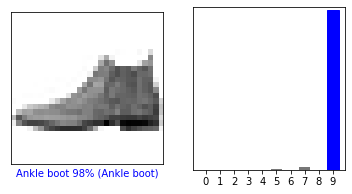

In [35]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, pred[i],  y_test)
plt.show()

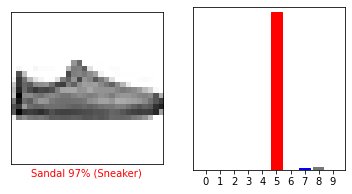

In [39]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, pred[i],  y_test)
plt.show()

#### 올바르게 예측된 레이블은 파란색이고 잘못 예측된 레이블은 빨강색이다.

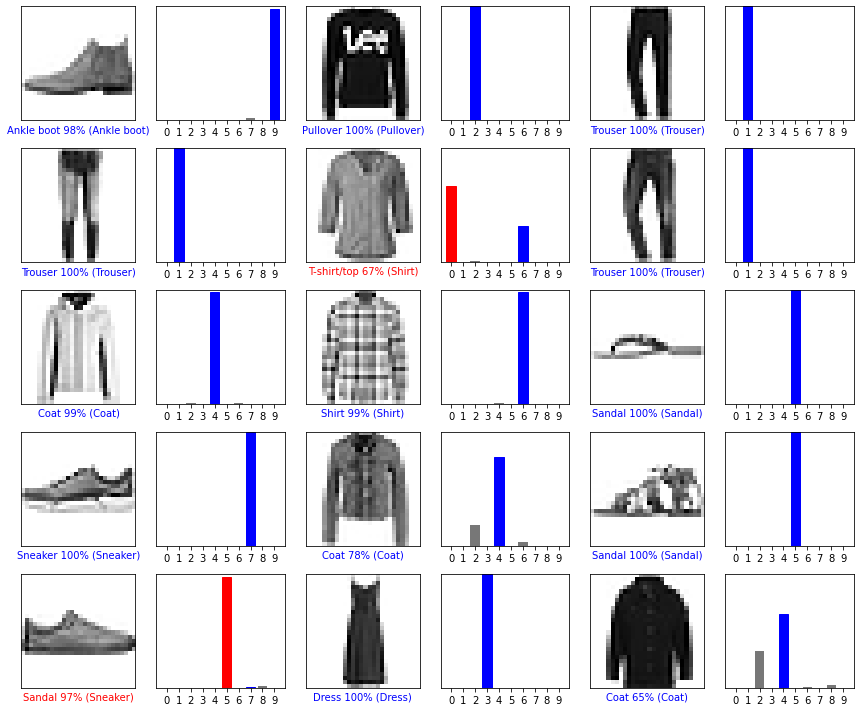

In [41]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, pred[i], y_test)
plt.tight_layout()
plt.show()

## 훈련된 모델 사용하기
훈련된 모델을 사용하여 한 이미지에 대한 예측을 만든다.

In [43]:
img = X_test[1]
print(img.shape)

(28, 28)


tf.keras 모델은 한 번에 샘플의 묶음 또는 배치(batch)로 예측을 만드는데 최적화되어 있습니다. 하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 합니다.

In [44]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


이제 예측을 해보자.

In [45]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.5782705e-04 3.2547449e-15 9.9921370e-01 7.2019460e-11 2.9941709e-04
  9.4568658e-12 2.2893655e-04 3.7365037e-12 5.1709836e-09 1.3452753e-13]]


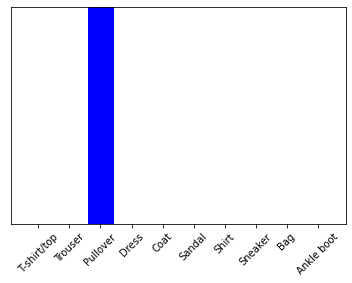

In [48]:
plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [49]:
np.argmax(predictions_single[0])

2

이상 Fashion MNIST image classification 복습 완료